# Getting started

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

We start by importing the dataset, and having a look at the data.

In [2]:
# Load the character metadata using relative path

character_metadata = pd.read_csv("..\..\data\character.metadata.tsv", sep='\t')

column_names = ['Wikipedia_Movie_ID', 'Freebase_Movie_ID', 'Movie_Release_Date', 'Character_Name', 'Actor_DOB', 'Actor_Gender', 'Actor_Height', 'Actor_Ethnicity', 'Actor_Name', 'Actor_Age_At_Movie_Release', 'Freebase_Character_Actor_Map_ID', 'Freebase_character_ID', 'Freebase_Actor_ID']
character_metadata.columns = column_names

character_metadata.sample(5)

,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_Release_Date,Character_Name,Actor_DOB,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_At_Movie_Release,Freebase_Character_Actor_Map_ID,Freebase_character_ID,Freebase_Actor_ID
441486,3307858,/m/094qc4,1998-04-24,Captain,1945-02-20,M,1.905,NaN,Brion James,53.0,/m/06lrxtz,/m/06lrxv1,/m/05njj5
372595,27329757,/m/0by05gp,2010-04-02,NaN,NaN,NaN,NaN,NaN,Frankie Gao,NaN,/m/0fz3r5f,NaN,/m/0fz3r57
199602,33876872,/m/04j1p_x,1937-07-28,NaN,1894-02-10,M,NaN,NaN,Roy D'Arcy,NaN,/m/0cg68ft,NaN,/m/0282rf4
134490,3790446,/m/0b04_7,1963-12-19,NaN,NaN,NaN,NaN,NaN,Silvia Monelli,NaN,/m/0gm1stg,NaN,/m/0gbym3s
159790,2493224,/m/07hqsc,2002-10-22,NaN,1967-08-27,M,NaN,NaN,Bob Nastanovich,35.0,/m/0k3f1q,NaN,/m/03xmprg


For conveniance, we will add a new line called Movie_Release_Year that contains the year of release instead of the precise date. This will allow us to plot the distribution of movie year of release more nicely. We add the attribute "format = 'mixed'" because the movie release date is presented in different formats depending on the movie. Avoiding this attribute would lead to a considerable amount of NaN values in the release year, even for movies that actually have a non NaN release date.  

We repeat the same procedure for the actor date of birth.

In [3]:
character_metadata['Actor_DOB'] = pd.to_datetime(character_metadata['Actor_DOB'], format = 'mixed', errors='coerce')


character_metadata['Movie_Release_Date'] = pd.to_datetime(character_metadata['Movie_Release_Date'], format = 'mixed', errors='coerce', utc=True)
character_metadata['Movie_Release_Year'] = character_metadata['Movie_Release_Date'].dt.year


character_metadata['Actor_DOB'] = pd.to_datetime(character_metadata['Actor_DOB'], format = 'mixed', errors='coerce', utc=True)
character_metadata['Actor_YOB'] = character_metadata['Actor_DOB'].dt.year

character_metadata.sample(5)

C:\Users\llitz\AppData\Local\Temp\ipykernel_10284\1039685591.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  character_metadata['Actor_DOB'] = pd.to_datetime(character_metadata['Actor_DOB'], format = 'mixed', errors='coerce')


,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_Release_Date,Character_Name,Actor_DOB,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_At_Movie_Release,Freebase_Character_Actor_Map_ID,Freebase_character_ID,Freebase_Actor_ID,Movie_Release_Year,Actor_YOB
306362,21500407,/m/05h32bt,2009-01-01 00:00:00+00:00,NaN,NaT,M,NaN,NaN,Gildart Jackson,NaN,/m/0gcq52c,NaN,/m/0gbxm28,2009.0,NaN
273936,30230467,/m/0g56xqy,2012-03-16 00:00:00+00:00,Professor Talloway,1969-09-17 00:00:00+00:00,M,1.778,NaN,Matthew Settle,42.0,/m/0gvn_q8,/m/0gvp0ht,/m/06crt6,2012.0,1969.0
285706,25011482,/m/09gf865,1994-02-01 00:00:00+00:00,NaN,1969-09-10 00:00:00+00:00,M,1.800,NaN,Johnathon Schaech,NaN,/m/0czxwsm,NaN,/m/076bgw,1994.0,1969.0
2037,27918049,/m/0ch2k69,2011-09-09 00:00:00+00:00,NaN,1926-04-30 00:00:00+00:00,F,1.660,/m/02ctzb,Cloris Leachman,85.0,/m/0hgt_dr,NaN,/m/02l3_5,2011.0,1926.0
243131,8863185,/m/027mglq,1953-01-01 00:00:00+00:00,Mr. Bagley,1896-11-04 00:00:00+00:00,M,NaN,NaN,Ian Wolfe,NaN,/m/0cv2w_c,/m/0cv2w_g,/m/02qsy5t,1953.0,1896.0


Let's have a look at the distribution of some features ! In this notebook, we apply the same preprocessing methodology to other features but we do not plot every single feature for the sake of readability.

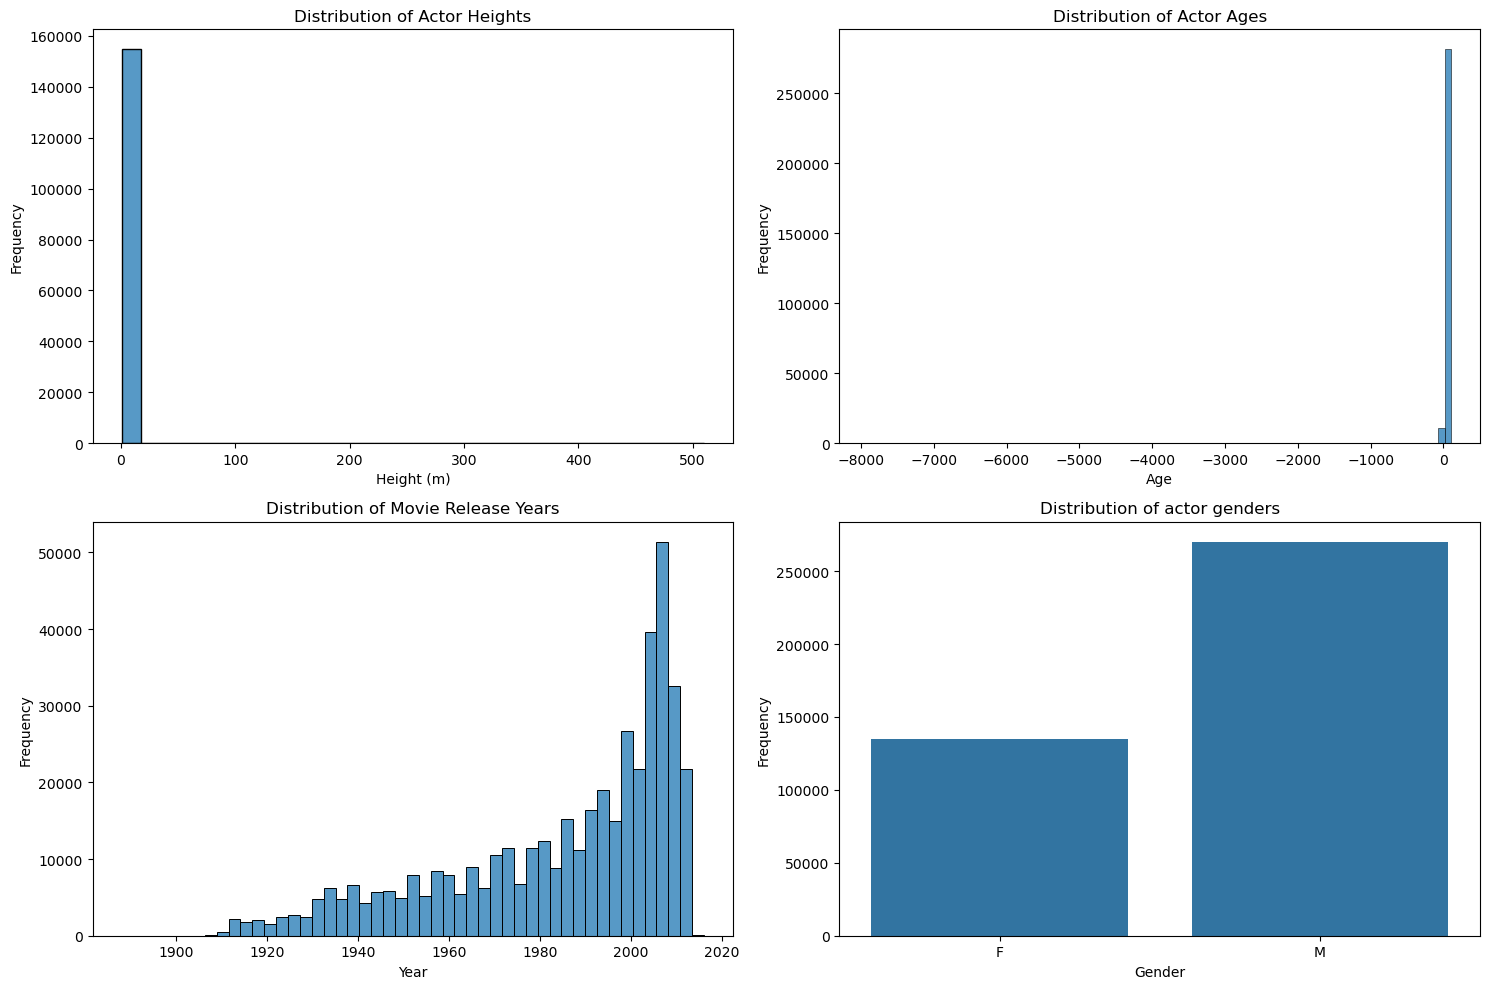

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(character_metadata['Actor_Height'], bins=30, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Actor Heights')
axs[0, 0].set_xlabel('Height (m)')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(character_metadata['Actor_Age_At_Movie_Release'], bins=92, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Actor Ages')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(character_metadata['Movie_Release_Year'], bins=49, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Movie Release Years')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Frequency')

sns.countplot(data=character_metadata, x='Actor_Gender', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of actor genders')
axs[1, 1].set_xlabel('Gender')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

We can observe that some values seem aberrant. We will have to clean the dataset to make sure to have reasonnable data.

# General preprocessing

We will first do a general preprocessing, and then we will focus on cleaning our data according to our subject of study. The general preprocessing will lead to a relatively small amount of data, but will be conveniant if we want to run a quick analysis on some specific features afterwards.

### Droping All NaNs and NaTs

Before dropping the missing values, we check their proportion for each feature of our dataset.

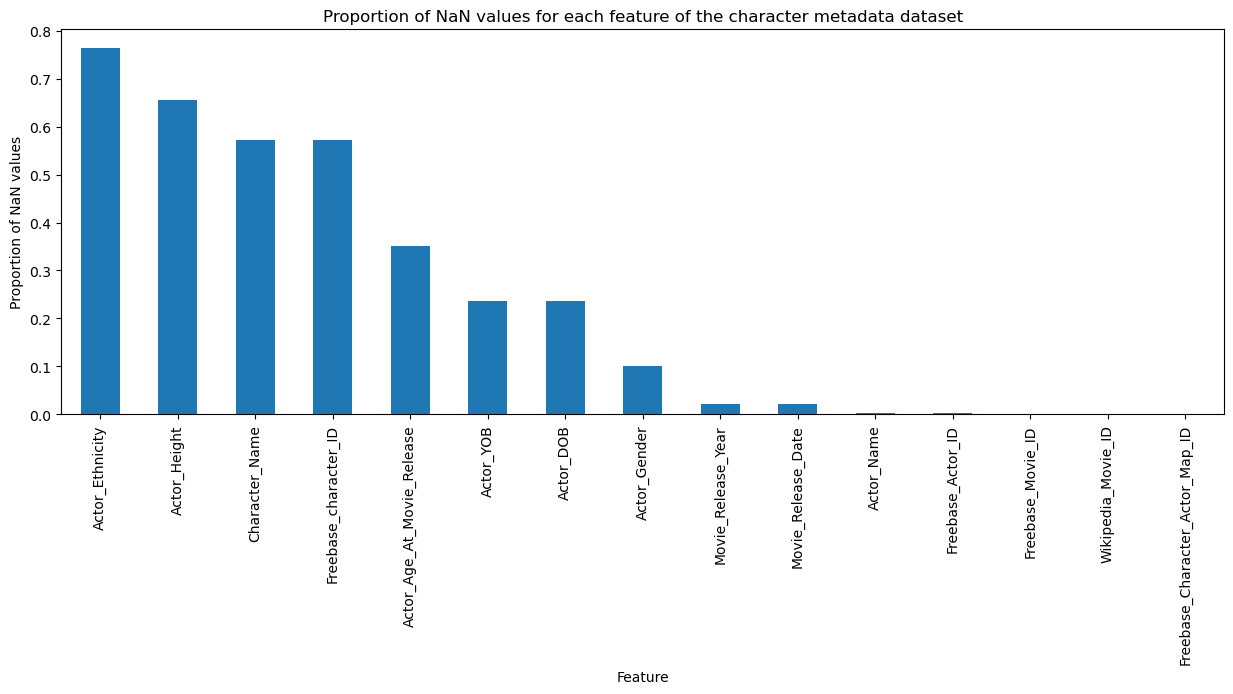

In [5]:
# plot the distibution of the proportion of nan values in each column of the character metadata dataframe. Sort them in descending order.

nan_proportions = character_metadata.isna().mean().sort_values(ascending=False)
nan_proportions.plot(kind='bar', figsize=(15, 5))
plt.title('Proportion of NaN values for each feature of the character metadata dataset')
plt.xlabel('Feature')
plt.ylabel('Proportion of NaN values')
plt.show()


We observe that some features contain a big amount of missing values, and we will need to be carefull about these features.

For now we do not focus on any feature, and we decide to drop every single empty values. As observed above, some feature have a majority of empty values, so dropping all the NaNs might not be a good idea when we want to do a targeted analysis. But for now we want a very general preprocessing.

In [6]:
copy1 = character_metadata.copy()
clean_data = copy1.dropna()

print("Length of original data: ", len(character_metadata), "Length of cleaned data: ", len(clean_data))

Length of original data:  450668 Length of cleaned data:  45264


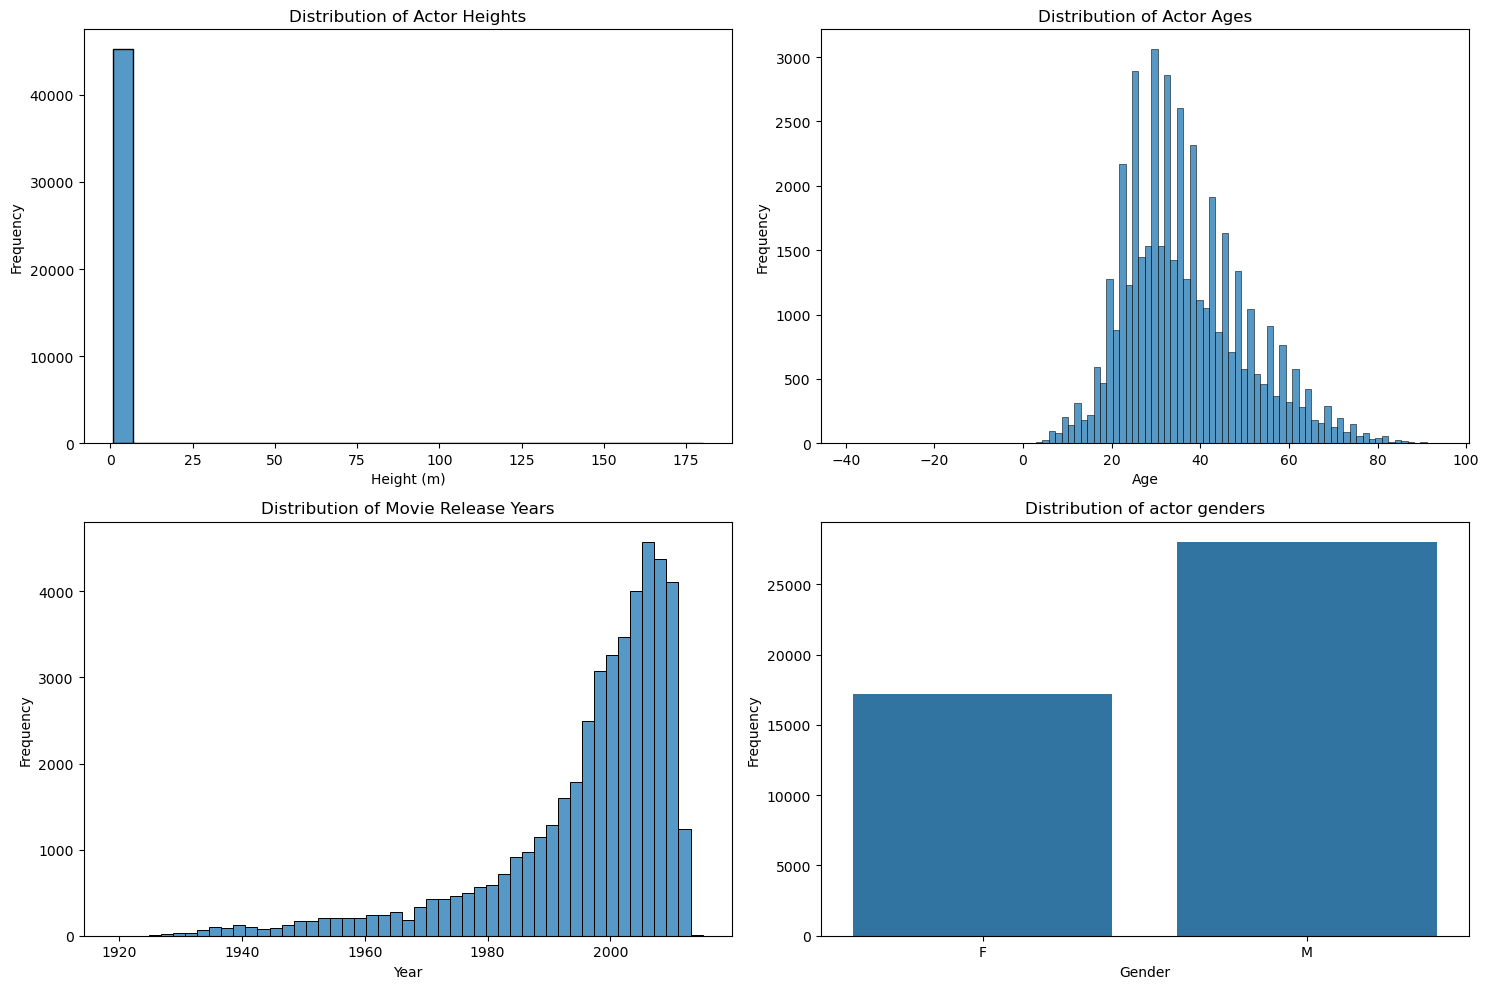

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(clean_data['Actor_Height'], bins=30, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Actor Heights')
axs[0, 0].set_xlabel('Height (m)')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(clean_data['Actor_Age_At_Movie_Release'], bins=92, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Actor Ages')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(clean_data['Movie_Release_Year'], bins=49, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Movie Release Years')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Frequency')

sns.countplot(data=clean_data, x='Actor_Gender', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of actor genders')
axs[1, 1].set_xlabel('Gender')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Although we removed empty values, we can still clearly observe aberrant values.

### Dropping aberrant values

We can see that even if there are no empty value, some values seem aberrant. We will get rid of these aberrant values.

In [8]:
clean_data = clean_data[clean_data['Actor_Height'] > 0]
clean_data = clean_data[clean_data['Actor_Height'] < 3]
clean_data = clean_data[clean_data['Actor_Age_At_Movie_Release'] > 0]
clean_data = clean_data[clean_data['Actor_Age_At_Movie_Release'] < 110]
clean_data = clean_data[clean_data['Movie_Release_Year'] > 1850]
clean_data = clean_data[clean_data['Movie_Release_Year'] < 2020]
clean_data = clean_data[clean_data['Actor_YOB'] > 1840]
clean_data = clean_data[clean_data['Actor_YOB'] < 2020]


print("Length of cleaned data after removing aberrant values: ", len(clean_data))

Length of cleaned data after removing aberrant values:  45236


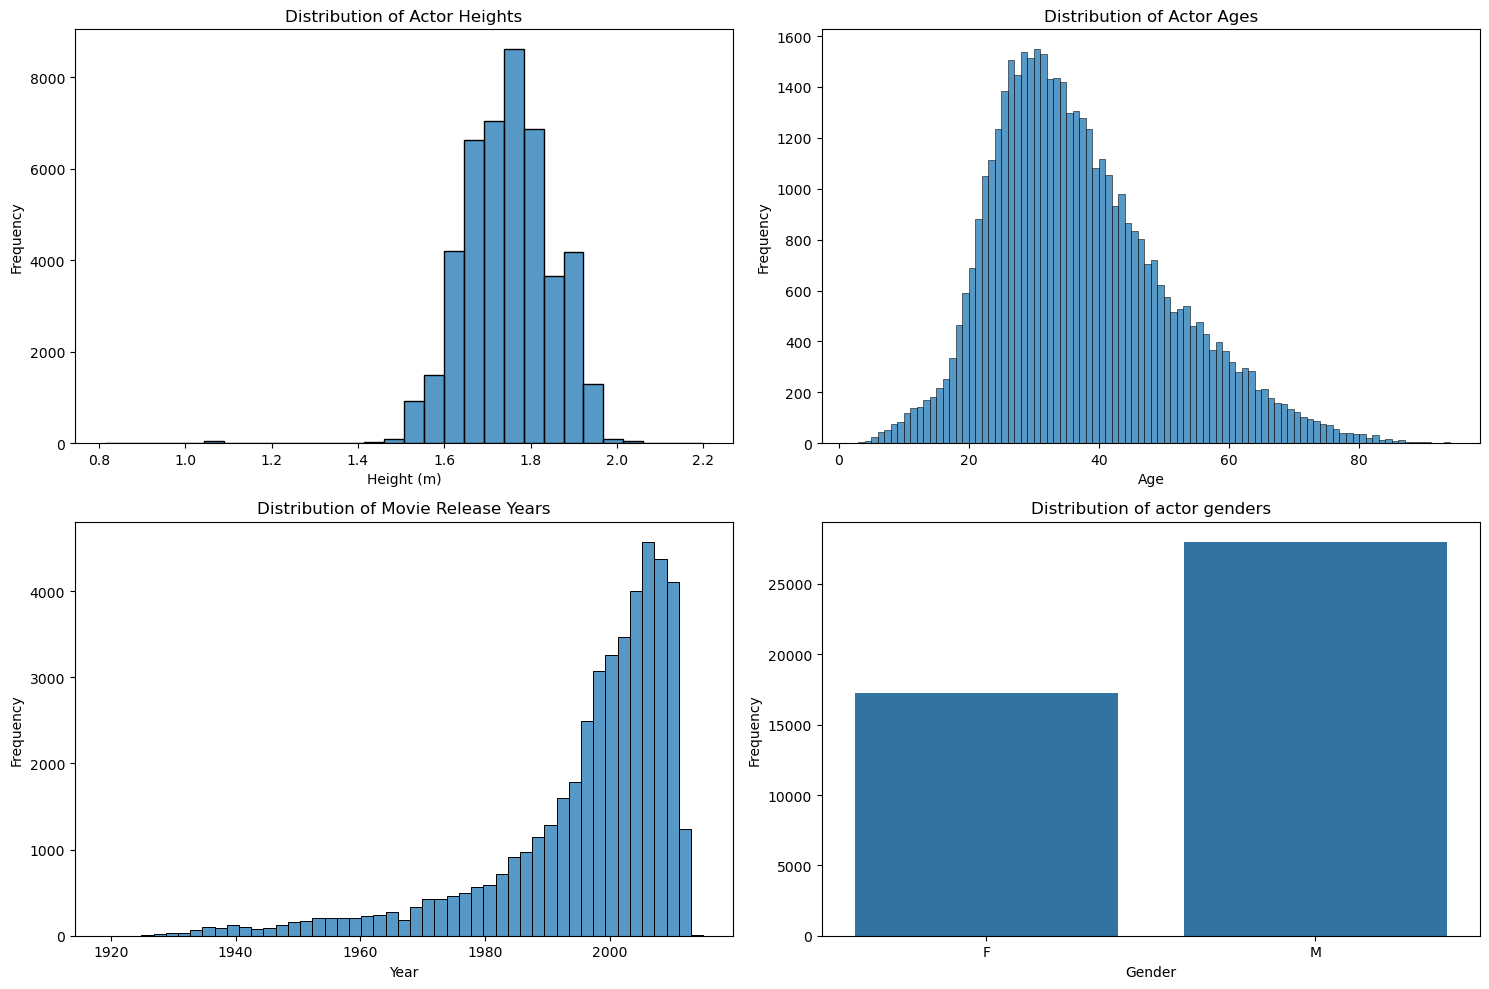

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(clean_data['Actor_Height'], bins=30, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Actor Heights')
axs[0, 0].set_xlabel('Height (m)')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(clean_data['Actor_Age_At_Movie_Release'], bins=92, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Actor Ages')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(clean_data['Movie_Release_Year'], bins=49, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Movie Release Years')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Frequency')

sns.countplot(data=clean_data, x='Actor_Gender', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of actor genders')
axs[1, 1].set_xlabel('Gender')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Now the data seem reasonable ! We will now start again from the original dataset, but focus on our subject.

# Taking into acount our subject

We are studying the impact of 9/11 on the movie industry. In this dataset, we are particularly interested in the release year and the actor ethnicity. We will get rid of all the useless columns.

First of all, we are interested in the column "ethnicity", so we need to create a function that maps from FreebaseID to the corresponding label. To do so, we use the freebase-wikidata-mapping dataset found here : https://www.kaggle.com/datasets/latebloomer/freebase-wikidata-mapping/data. 

In [10]:
def freebase2label(freebase_id, mapping_dataframe):
    label = mapping_dataframe[mapping_dataframe['freebase_id'] == freebase_id]['label']
    if len(label) > 0:
        return label.values[0]
    else:
        return None
    
file_path = r"..\..\data\freebase_mapping.tsv"
freebase_mapping_df = pd.read_csv(file_path, sep='\t')

Before applying our function, we first need to clean the dataset. Let's first remove the columns we're not interested in.

In [11]:
dataset = character_metadata.copy()
dataset = dataset.drop(columns=['Movie_Release_Date', 'Actor_DOB', 'Actor_Gender', 'Actor_Height', 'Actor_YOB'])

In [27]:
dataset.sample(5)

,Wikipedia_Movie_ID,Freebase_Movie_ID,Character_Name,Actor_Ethnicity,Actor_Name,Actor_Age_At_Movie_Release,Freebase_Character_Actor_Map_ID,Freebase_character_ID,Freebase_Actor_ID,Movie_Release_Year
128228,31684531,/m/0gmdmgk,NaN,NaN,Robert Romanus,51.0,/m/0gw2_dn,NaN,/m/070j6d,2008.0
402952,5456819,/m/0dmqyj,Daniel Brecht,NaN,Matt Craven,50.0,/m/02vcrpx,/m/0gz6jgm,/m/07nvq1,2007.0
247276,3782305,/m/09_q5s,NaN,NaN,Tom Tully,44.0,/m/0gc3xj1,NaN,/m/04ymy7,1952.0
273231,28726770,/m/0cz9kv7,NaN,NaN,Charles Farrell,30.0,/m/0gct20w,NaN,/m/0cwj7d,1932.0
358549,7087294,/m/0h3k99,Bobby,NaN,Frank Van Laecke,27.0,/m/0j8tj6x,/m/0j8tj6_,/m/0j8tj76,1986.0


Depending on what feature we want to study, we drop the missing values in the corresponding columns.

In [13]:
release_year_dataset = dataset.copy()
release_year_dataset = release_year_dataset.dropna(subset=['Movie_Release_Year'])

ethnicity_dataset = dataset.copy()
ethnicity_dataset = ethnicity_dataset.dropna(subset=['Actor_Ethnicity'])

no_nan_dataset = dataset.copy()
no_nan_dataset = no_nan_dataset.dropna()

print("Length of original dataset: ", len(dataset))

print("Length of dataset with no NaN values in Movie_Release_Year: ", len(release_year_dataset))
print("Length of dataset with no NaN values in Actor_Ethnicity: ", len(ethnicity_dataset))
print("Length of dataset with no NaN values at all: ", len(no_nan_dataset))

Length of original dataset:  450668
Length of dataset with no NaN values in Movie_Release_Year:  440658
Length of dataset with no NaN values in Actor_Ethnicity:  106058
Length of dataset with no NaN values at all:  56977


In [14]:
release_year_dataset = release_year_dataset[release_year_dataset['Actor_Age_At_Movie_Release'] > 0]
release_year_dataset = release_year_dataset[release_year_dataset['Actor_Age_At_Movie_Release'] < 110]
release_year_dataset = release_year_dataset[release_year_dataset['Movie_Release_Year'] > 1850]
release_year_dataset = release_year_dataset[release_year_dataset['Movie_Release_Year'] < 2020]

print("Length of release year dataset after removing aberrant values: ", len(release_year_dataset))

ethnicity_dataset = ethnicity_dataset[ethnicity_dataset['Actor_Age_At_Movie_Release'] > 0]
ethnicity_dataset = ethnicity_dataset[ethnicity_dataset['Actor_Age_At_Movie_Release'] < 110]
ethnicity_dataset = ethnicity_dataset[ethnicity_dataset['Movie_Release_Year'] > 1850]
ethnicity_dataset = ethnicity_dataset[ethnicity_dataset['Movie_Release_Year'] < 2020]

print("Length of ethnicity dataset after removing aberrant values: ", len(ethnicity_dataset))

no_nan_dataset = no_nan_dataset[no_nan_dataset['Actor_Age_At_Movie_Release'] > 0]
no_nan_dataset = no_nan_dataset[no_nan_dataset['Actor_Age_At_Movie_Release'] < 110]
no_nan_dataset = no_nan_dataset[no_nan_dataset['Movie_Release_Year'] > 1850]
no_nan_dataset = no_nan_dataset[no_nan_dataset['Movie_Release_Year'] < 2020]

print("Length of no nan dataset after removing aberrant values: ", len(no_nan_dataset))


Length of release year dataset after removing aberrant values:  292122
Length of ethnicity dataset after removing aberrant values:  93246
Length of no nan dataset after removing aberrant values:  56947


We can now check that the data seems reasonnably distributed and that it does not contain aberrant values.

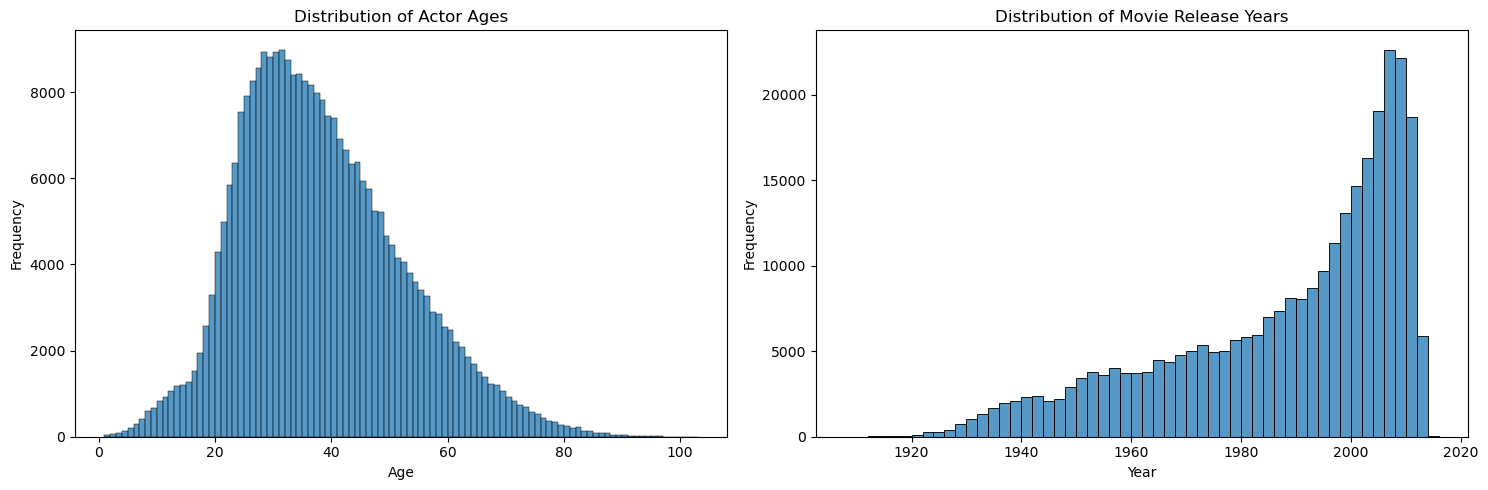

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(release_year_dataset['Actor_Age_At_Movie_Release'], bins=102, ax=axs[0])
axs[0].set_title('Distribution of Actor Ages')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

sns.histplot(release_year_dataset['Movie_Release_Year'], bins=54, ax=axs[1])
axs[1].set_title('Distribution of Movie Release Years')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Freebase to label

In [ ]:
# apply this function to the 'freebase_character_ID' column, for the non empty values

# copy2['Ethnicity_Label'] = copy2['Actor_Ethnicity'].apply(lambda x: freebase2label(x, freebase_mapping_df) if pd.notnull(x) else None)

# copy2.to_csv("..\..\data\Ethnicity_Labels.csv")

In [29]:
freebase = '/m/0j8tj76'

print(freebase2label(freebase, freebase_mapping_df))

None
